<a href="https://colab.research.google.com/github/Manojkumar310897/Akaike_assignments/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.utils import shuffle


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
book_train = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/train.parquet')

In [4]:
book_train.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [5]:
book_train['Date']=[pd.to_datetime(x) for x in book_train['Date']]

In [6]:
book_train.reset_index(inplace=True,drop=True)

In [7]:
book_train

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
3220863,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
3220864,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
3220865,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
3220866,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [8]:
len(book_train)

3220868

In [9]:
book_train.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [10]:
target_index=book_train[book_train['Incident']=='TARGET DRUG']['Patient-Uid'].unique()

In [11]:
target_index

array(['a0eb742b-1c7c-11ec-8f61-16262ee38c7f',
       'a0edaf09-1c7c-11ec-a360-16262ee38c7f',
       'a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f', ...,
       'a0ef1c8c-1c7c-11ec-b007-16262ee38c7f',
       'a0f08a4d-1c7c-11ec-bb15-16262ee38c7f',
       'a0efc1fa-1c7c-11ec-9e1c-16262ee38c7f'], dtype=object)

In [12]:
len(book_train)

3220868

In [13]:
book_train.nunique()

Patient-Uid    27033
Date            1977
Incident          57
dtype: int64

In [14]:
new_df=book_train.iloc[0:0]

In [15]:
new_df

,Patient-Uid,Date,Incident


In [16]:
train_copy=book_train.copy()

In [17]:
train_copy


,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
3220863,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
3220864,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
3220865,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
3220866,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [18]:
train_copy.sort_values(by=['Patient-Uid','Date'],inplace=True)

In [19]:
df=dict(list(train_copy.groupby('Patient-Uid')))

In [20]:
df

{'a0db1e73-1c7c-11ec-ae39-16262ee38c7f':                                   Patient-Uid       Date           Incident
 956739   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2015-09-22        DRUG_TYPE_7
 804777   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13     SYMPTOM_TYPE_2
 757673   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-05-02        DRUG_TYPE_7
 121904   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23     SYMPTOM_TYPE_0
 304144   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23        DRUG_TYPE_9
 ...                                       ...        ...                ...
 356634   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2020-08-04  PRIMARY_DIAGNOSIS
 518059   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2020-08-05        DRUG_TYPE_7
 1485561  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2020-08-05        DRUG_TYPE_2
 1048459  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2020-08-07        DRUG_TYPE_2
 1754691  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2020-08-09        DRUG_TYPE_2
 
 [96 rows x 3 columns],
 'a0dc93f2

In [21]:
p=df['a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f']
p.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

In [22]:
for i in df.keys():
  df[i].set_index(df[i]['Date'],drop=True,inplace=True)

# *Finding Patients given Target drug*

In [23]:
for i in df.keys():
  if i in target_index:
   for j in list(df[i].index):
     tra_dat=list(df[i][df[i]['Incident']=='TARGET DRUG'].Date)[0]
     date=list(pd.date_range(end=tra_dat,periods=30,freq='D'))
     if j in date:
       t=df[i].loc[:j,:]
   new_df=pd.concat([new_df,t],ignore_index=True)




In [24]:
new_df

,Patient-Uid,Date,Incident
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-04-14,DRUG_TYPE_7
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,TEST_TYPE_0
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_0
3,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_8
4,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_7
...,...,...,...
974989,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-04-10,DRUG_TYPE_1
974990,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,PRIMARY_DIAGNOSIS
974991,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,TEST_TYPE_1
974992,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,TEST_TYPE_2


In [25]:
new_df1=pd.get_dummies(new_df['Incident'])

In [26]:
new_df1

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974989,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
974992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
new_df1=pd.concat([new_df,new_df1],axis=1)


In [28]:
new_df1.drop(['Incident','Date','TARGET DRUG'],axis=1,inplace=True)

In [29]:
new_df1


,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974989,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974990,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974991,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
974992,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
col=list(new_df1.columns[1:])

In [31]:
new_df1=new_df1.groupby('Patient-Uid')[col].sum()

In [32]:
new_df1['Target Drug']=1

In [33]:
new_df1

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Target Drug
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,6,10,0,10,0,0,0,0,0,0,...,0,0,0,4,1,1,0,0,0,1
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,5,3,2,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,1
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,1,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,9,0,0,0,0,1
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,12,17,0,6,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,41,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,18,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,7,48,0,3,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1


# *Finding Patients not given Target drug*

In [34]:
nontarget=book_train.iloc[0:0]

In [35]:
nontarget

,Patient-Uid,Date,Incident


In [36]:
for i in df.keys():
  if i not in target_index:
     g=df[i]
     nontarget=pd.concat([nontarget,g],ignore_index=True)

In [37]:
nontarget

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9
...,...,...,...
1784074,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-06-17,DRUG_TYPE_1
1784075,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-07-14,PRIMARY_DIAGNOSIS
1784076,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-07-14,DRUG_TYPE_1
1784077,a0e9c354-1c7c-11ec-84f5-16262ee38c7f,2020-08-06,DRUG_TYPE_1


In [38]:
non_target=pd.get_dummies(nontarget['Incident'])


In [39]:
non_target=pd.concat([nontarget,non_target],axis=1)

In [40]:
non_target.drop(['Incident','Date'],axis=1,inplace=True)
col1=list(non_target.columns[1:])
non_target=non_target.groupby('Patient-Uid')[col1].sum()

In [41]:
non_target['Target Drug']=0

In [42]:
non_target

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Target Drug
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,0,...,1,0,0,10,2,0,0,0,0,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,0,...,0,0,0,1,4,0,0,0,0,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,0,...,0,0,0,3,2,0,0,0,0,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,0,...,5,6,0,9,27,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0e9c298-1c7c-11ec-954b-16262ee38c7f,4,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0e9c2c7-1c7c-11ec-9b2e-16262ee38c7f,7,0,0,0,0,0,0,0,0,0,...,1,0,0,16,1,0,0,0,0,0
a0e9c2f7-1c7c-11ec-8bac-16262ee38c7f,0,11,0,0,0,0,0,0,0,0,...,1,0,0,0,5,0,0,0,0,0


# *Dataframe with both Patients given Target drug and not*

In [43]:
Patient_df=pd.concat([new_df1,non_target])


In [44]:
Patient_df.fillna(0.0,inplace=True)

In [45]:
Patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27033 entries, a0e9c384-1c7c-11ec-81a0-16262ee38c7f to a0e9c354-1c7c-11ec-84f5-16262ee38c7f
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DRUG_TYPE_0        27033 non-null  uint64 
 1   DRUG_TYPE_1        27033 non-null  uint64 
 2   DRUG_TYPE_10       27033 non-null  uint64 
 3   DRUG_TYPE_11       27033 non-null  uint64 
 4   DRUG_TYPE_12       27033 non-null  uint64 
 5   DRUG_TYPE_13       27033 non-null  uint64 
 6   DRUG_TYPE_14       27033 non-null  uint64 
 7   DRUG_TYPE_15       27033 non-null  uint64 
 8   DRUG_TYPE_16       27033 non-null  uint64 
 9   DRUG_TYPE_17       27033 non-null  uint64 
 10  DRUG_TYPE_2        27033 non-null  uint64 
 11  DRUG_TYPE_3        27033 non-null  uint64 
 12  DRUG_TYPE_4        27033 non-null  uint64 
 13  DRUG_TYPE_5        27033 non-null  uint64 
 14  DRUG_TYPE_6        27033 non-null  uint64 
 15  DRUG_TYPE

In [46]:
Patient_df.reset_index(inplace=True)

In [47]:
Patient_df=shuffle(Patient_df)
Patient_df.reset_index(inplace=True,drop=True)

In [48]:
Patient_df

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Target Drug,DRUG_TYPE_18
0,a0e797ce-1c7c-11ec-979f-16262ee38c7f,41,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,a0ee9fd7-1c7c-11ec-be01-16262ee38c7f,3,10,0,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
2,a0ddf232-1c7c-11ec-9272-16262ee38c7f,2,0,0,1,0,0,0,0,0,...,0,0,2,9,0,0,0,0,0,0.0
3,a0de86f0-1c7c-11ec-8eeb-16262ee38c7f,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,a0e015dd-1c7c-11ec-9520-16262ee38c7f,27,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27028,a0e7ea58-1c7c-11ec-8b22-16262ee38c7f,1,4,0,0,0,0,19,0,0,...,1,0,0,3,0,0,0,0,0,0.0
27029,a0ee024d-1c7c-11ec-ac24-16262ee38c7f,1,21,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.0
27030,a0de561a-1c7c-11ec-a486-16262ee38c7f,37,29,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0.0
27031,a0ead525-1c7c-11ec-b554-16262ee38c7f,2,2,0,0,0,37,0,0,0,...,0,0,0,2,0,0,0,0,1,0.0


In [49]:
l=[len(Patient_df[Patient_df['Target Drug']==1]),len(Patient_df[Patient_df['Target Drug']==0])]

# **Plotting counts of patients given target drug and not given target drug**

In [50]:
Patient_df['Target Drug'].value_counts()

0    17659
1     9374
Name: Target Drug, dtype: int64

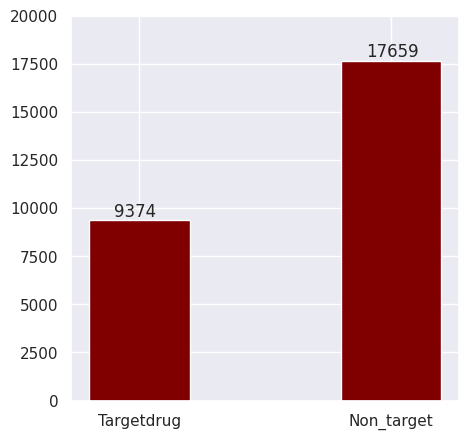

In [51]:
fig = plt.figure(figsize = (5, 5))
# creating the bar plot
plt.bar(['Targetdrug','Non_target'], l, color ='maroon',width = 0.4)
plt.text(x=-.1,y=l[0]+ 200, s=str(l[0]))
plt.text(x=0.9,y=l[1]+ 200, s=str(l[1]))
plt.ylim(0,20000)
plt.show()

In [52]:
Patient_df.corr()['Target Drug']

<ipython-input-52-4936a93b1034>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Patient_df.corr()['Target Drug']


DRUG_TYPE_0         -0.117774
DRUG_TYPE_1         -0.161045
DRUG_TYPE_10         0.013136
DRUG_TYPE_11         0.118308
DRUG_TYPE_12         0.018473
DRUG_TYPE_13         0.023940
DRUG_TYPE_14         0.018513
DRUG_TYPE_15         0.014482
DRUG_TYPE_16         0.018041
DRUG_TYPE_17        -0.031800
DRUG_TYPE_2          0.262028
DRUG_TYPE_3          0.111783
DRUG_TYPE_4         -0.110549
DRUG_TYPE_5         -0.115315
DRUG_TYPE_6         -0.121944
DRUG_TYPE_7          0.089996
DRUG_TYPE_8         -0.148316
DRUG_TYPE_9          0.094826
PRIMARY_DIAGNOSIS    0.107684
SYMPTOM_TYPE_0       0.113334
SYMPTOM_TYPE_1       0.059224
SYMPTOM_TYPE_10     -0.008689
SYMPTOM_TYPE_11     -0.002176
SYMPTOM_TYPE_12     -0.009214
SYMPTOM_TYPE_13      0.016740
SYMPTOM_TYPE_14     -0.003586
SYMPTOM_TYPE_15      0.027722
SYMPTOM_TYPE_16     -0.005239
SYMPTOM_TYPE_17     -0.008393
SYMPTOM_TYPE_18     -0.001338
SYMPTOM_TYPE_19      0.014087
SYMPTOM_TYPE_2       0.016480
SYMPTOM_TYPE_20      0.001499
SYMPTOM_TY

# **Importing Test Dataset for prediction**

In [53]:
test_df=pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/test.parquet')
test_df

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [54]:
test_df['Incident'].unique()

array(['SYMPTOM_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_2', 'DRUG_TYPE_1',
       'PRIMARY_DIAGNOSIS', 'DRUG_TYPE_8', 'TEST_TYPE_0', 'DRUG_TYPE_7',
       'DRUG_TYPE_11', 'SYMPTOM_TYPE_6', 'DRUG_TYPE_5', 'DRUG_TYPE_6',
       'DRUG_TYPE_9', 'DRUG_TYPE_15', 'TEST_TYPE_3', 'SYMPTOM_TYPE_3',
       'TEST_TYPE_1', 'DRUG_TYPE_3', 'TEST_TYPE_2', 'SYMPTOM_TYPE_7',
       'DRUG_TYPE_12', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_10',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_9',
       'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_29',
       'DRUG_TYPE_13', 'SYMPTOM_TYPE_21', 'DRUG_TYPE_4',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_19',
       'DRUG_TYPE_14', 'SYMPTOM_TYPE_16', 'TEST_TYPE_4', 'DRUG_TYPE_10',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_24',
       'DRUG_TYPE_16', 'SYMPTOM_TYPE_13', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_22',
       'DRUG_TYPE_1

In [55]:
test_dum=pd.get_dummies(test_df['Incident'])

In [56]:
test_copy=test_df.copy()

In [57]:
test_copy=pd.concat([test_copy,test_dum],axis=1)

In [58]:
test_copy.drop(['Date','Incident'],inplace=True,axis=1)

In [59]:
test_col=list(test_copy.columns[1:])

In [60]:
test_copy=test_copy.groupby('Patient-Uid')[test_col].sum().reset_index()

In [61]:
test_copy

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8,3,0,1,0,0,0,0,0,...,3,0,0,0,2,0,0,0,0,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2,30,0,0,0,0,0,9,0,...,2,0,0,0,0,0,0,1,0,0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4,33,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,33,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,4,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,14,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,5,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# *Preparing Train and Test Data for model perparation*

In [62]:
T_list=list(test_copy.columns[1:])

In [63]:
test_x=test_copy[T_list]

In [64]:
x_train=Patient_df[T_list]

In [65]:
y_train=Patient_df["Target Drug"]

# *Train and Test split*

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.40,random_state=101)

# **`Model Creation`**



**Scaling** input featurees

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
test_x= sc.fit_transform(test_x)

# **Creating Model Using Tensorflow**

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam,RMSprop,SGD

In [71]:
model = Sequential()
model.add(Dense(23))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation ='sigmoid')) 

In [72]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),batch_size=250 , epochs=100)

Epoch 1/100
65/65 [==============================] - 3s 12ms/step - loss: 0.6569 - accuracy: 0.6433 - val_loss: 0.6111 - val_accuracy: 0.6531
Epoch 2/100
65/65 [==============================] - 0s 7ms/step - loss: 0.5487 - accuracy: 0.7027 - val_loss: 0.5295 - val_accuracy: 0.7260
Epoch 3/100
65/65 [==============================] - 0s 5ms/step - loss: 0.4944 - accuracy: 0.7598 - val_loss: 0.5013 - val_accuracy: 0.7574
Epoch 4/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7735 - val_loss: 0.4927 - val_accuracy: 0.7598
Epoch 5/100
65/65 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.7768 - val_loss: 0.4843 - val_accuracy: 0.7643
Epoch 6/100
65/65 [==============================] - 0s 5ms/step - loss: 0.4559 - accuracy: 0.7815 - val_loss: 0.4796 - val_accuracy: 0.7672
Epoch 7/100
65/65 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.7846 - val_loss: 0.4778 - val_accuracy: 0.7675
Epoch 8/100


In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                1288      
                                                                 
 dense_1 (Dense)             (None, 16)                384       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainabl

# **Evaluation With F1 Score**

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
prediction = model.predict(x_test)
prediction

338/338 [==============================] - 1s 1ms/step


array([[0.9949564 ],
       [0.24636628],
       [0.05995719],
       ...,
       [0.86184853],
       [0.01154592],
       [0.6426406 ]], dtype=float32)

In [77]:
print(classification_report(y_test,prediction.round()))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      6978
           1       0.70      0.67      0.69      3836

    accuracy                           0.78     10814
   macro avg       0.76      0.76      0.76     10814
weighted avg       0.78      0.78      0.78     10814



# *Predicting for Test Dataset given*

In [78]:
test_pred=model.predict(test_x)

359/359 [==============================] - 1s 1ms/step


In [79]:
test_y=test_pred.round()
test_y

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [80]:
test_copy['label']=test_y

In [81]:
test_copy=test_copy.astype({'label':'int'})

In [82]:
output_df=test_copy[['Patient-Uid','label']]

In [83]:
output_df

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,1
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,1
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,1


In [84]:
output_df['label'].value_counts()

0    7695
1    3787
Name: label, dtype: int64

In [85]:
output_df.to_csv('final_submission.csv')